In [1]:
import torch
import utils
import matplotlib.pyplot as plt

from pedestrian_dataset import PennFudanDataset, get_transform
from classifier import Classifier, draw_bounding_boxes, show

In [2]:
data_dir = '../PennFudanPed'
dataset= PennFudanDataset(data_dir, get_transform(train=False), get_original_image=True)

In [3]:
data_loader = torch.utils.data.DataLoader(
            dataset, batch_size=1, shuffle=False, num_workers=4,
            collate_fn=utils.collate_fn)

In [18]:
element = dataset[-1]

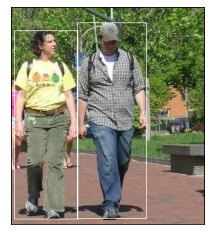

In [19]:
boxed_image = draw_bounding_boxes(element[1]['original'], element[1]['boxes'])
show(boxed_image)

In [20]:
classifier = Classifier.load('../pedestrian_trained_models/1/epoch0')

In [21]:
prediction = classifier.predict(element[0])

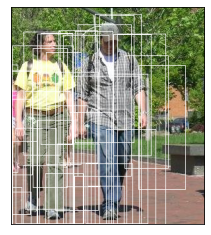

In [23]:
boxed_image = draw_bounding_boxes(element[1]['original'], prediction[0]['boxes'])
show(boxed_image)


In [24]:
classifier = Classifier.load('../pedestrian_trained_models/1/epoch9')

In [25]:
prediction = classifier.predict(element[0])


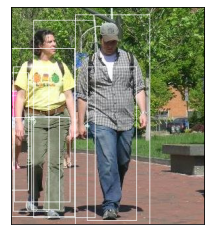

In [26]:
boxed_image = draw_bounding_boxes(element[1]['original'], prediction[0]['boxes'])
show(boxed_image)


In [27]:

dataset[1:3]

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'